In [26]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [16]:
path =  'Dataset'
names = [name.replace(' ', '_').split('_')[0] for name in os.listdir(path)] #list of all first names from list of all files
classes = Counter(names)  #returns dictionary with key as name, count as value {}
#['schinus', 19.jpg]
print("Total number of images is {}".format(len(names)))

Total number of images is 789


In [17]:
print(names)

['anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'anadenanthera', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arecaceae', 'arrabidaea', 'arrabidaea', 'arrabidaea', 'arrabidaea', 'arrabidaea', 'arrabidaea', 'arrabidaea', 'arrabidaea', 'arrabidaea', 'arrabidaea', 'arrabidaea', 'arrabidaea', 'arrabidaea', 'arrabidaea', 'arrabidaea', 'arrabidaea

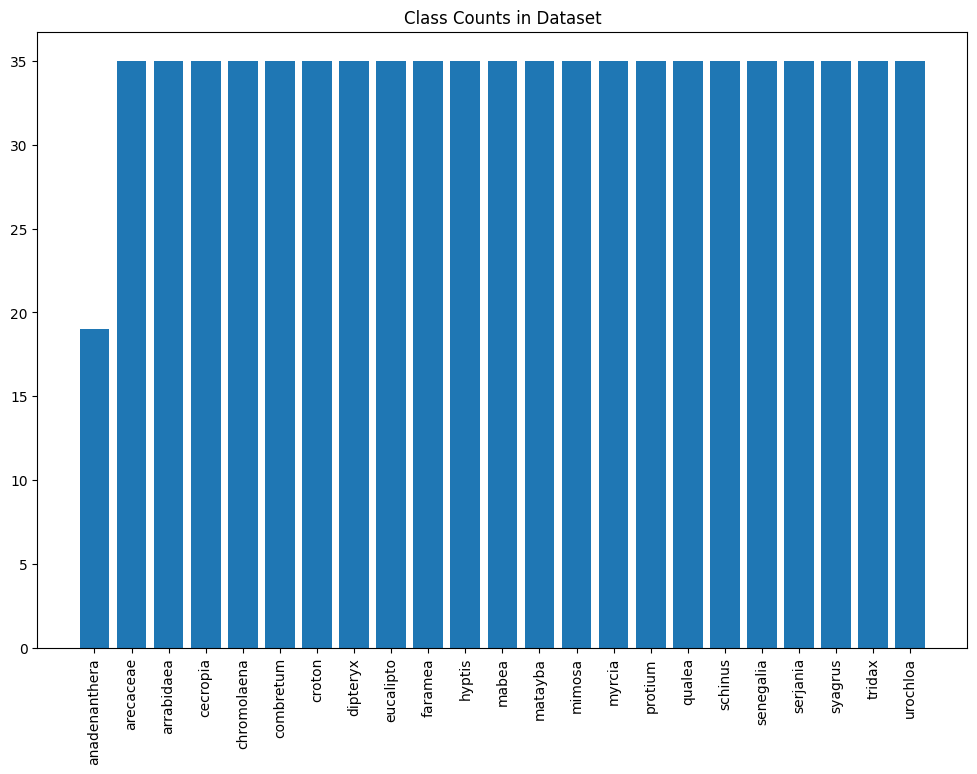

In [18]:
plt.figure(figsize = (12,8))
plt.title('Class Counts in Dataset')
plt.bar(*zip(*classes.items())) #graph of class v count data
plt.xticks(rotation='vertical')
plt.show()

In [19]:
print(classes)

Counter({'arecaceae': 35, 'arrabidaea': 35, 'cecropia': 35, 'chromolaena': 35, 'combretum': 35, 'croton': 35, 'dipteryx': 35, 'eucalipto': 35, 'faramea': 35, 'hyptis': 35, 'mabea': 35, 'matayba': 35, 'mimosa': 35, 'myrcia': 35, 'protium': 35, 'qualea': 35, 'schinus': 35, 'senegalia': 35, 'serjania': 35, 'syagrus': 35, 'tridax': 35, 'urochloa': 35, 'anadenanthera': 19})


In [20]:
path_class  = {key:[] for key in classes.keys()} #dict of class and path to come

for name in os.listdir(path):
    key = name.replace(' ', '_').split('_')[0] #assigning each key the path
    path_class[key].append(path + '/' + name) #adding the path into a list which is the value of all images of the species

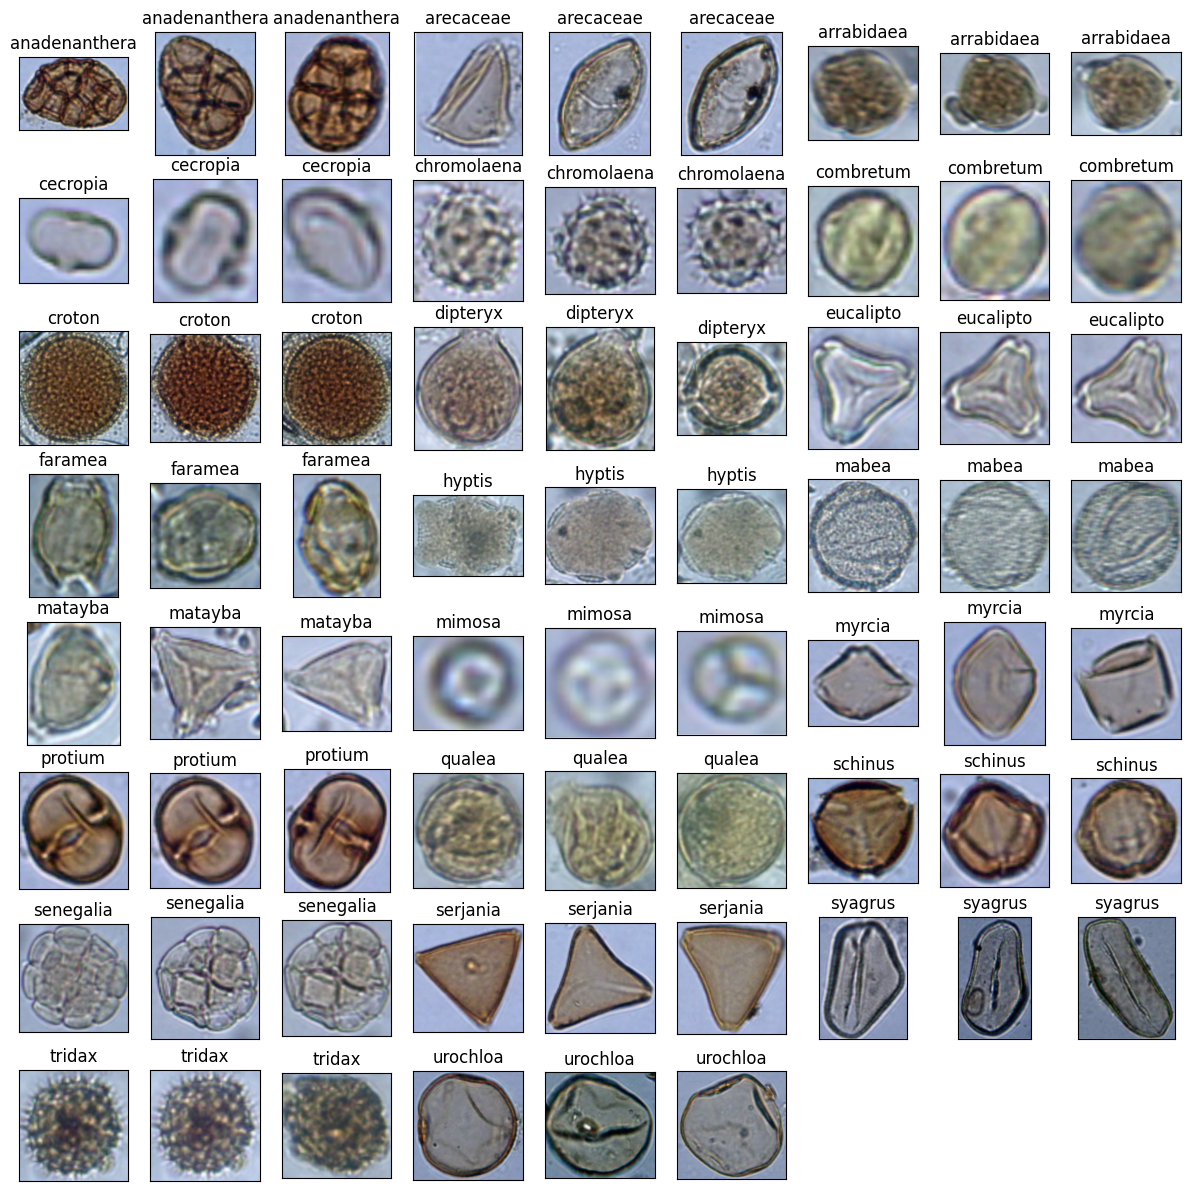

In [21]:
fig = plt.figure(figsize=(15, 15))
for i, key in enumerate(path_class.keys()):
    img1 = Image.open(path_class[key][0]) #opens first three images of each class
    img2 = Image.open(path_class[key][1])
    img3 = Image.open(path_class[key][2])

    ax = fig.add_subplot(8, 9,  3*i + 1, xticks=[], yticks=[])
    ax.imshow(img1)
    ax.set_title(key)

    ax = fig.add_subplot(8, 9,  3*i + 2, xticks=[], yticks=[])
    ax.imshow(img2)
    ax.set_title(key)

    ax = fig.add_subplot(8, 9,  3*i + 3, xticks=[], yticks=[])
    ax.imshow(img3)
    ax.set_title(key)

## Preprocessing


In [22]:
def process_img(img, size = (128,128)):
    img = cv2.resize(img, size)  # resize image
    img = img/255                   # divide values by 255
    return img

In [39]:
X, Y = [], []     #x list of processed images, y list of class of that image
for name  in os.listdir(path):   #apply resize to all images
    img = cv2.imread(path + '/' + name)
    X.append(process_img(img))
    Y.append(name.replace(' ', '_').split('_')[0])

X = np.array(X)

In [40]:
le = LabelEncoder()
Y_le = le.fit_transform(Y)
Y_cat = to_categorical(Y_le, 23)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_cat, test_size=0.285)
print("Images in each class in Test set: {}".format(np.sum(Y_test, axis =0)))

Images in each class in Test set: [ 5.  8.  3. 10. 11. 11. 13. 11.  8. 14.  9. 14. 11. 12.  8.  8.  9. 11.
  9. 14.  9.  7. 10.]


## Model

In [42]:
pretrained_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(128,128,3),
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [43]:
pretrained_model.trainable = False

In [44]:
model = tf.keras.models.Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(500, activation = 'relu'))
model.add(tf.keras.layers.Dense(150, activation = 'relu'))
model.add(tf.keras.layers.Dense(23, activation = 'softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 2, 2, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │       4,096,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          75,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 23)                  │           3,473 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,977,907 (99.10 MB)

 Trainable params: 4,175,123 (15.93 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [45]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Data Augmentation and fitting

In [46]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                rotation_range= 20,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                horizontal_flip = True,
                vertical_flip = True,)
# fitting the data generator
data_generator.fit(X_train)

In [49]:
tf.keras.callbacks.ModelCheckpoint(
    filepath='cnn.keras',
    save_best_only=True
)

In [ ]:
batch_size = 4
epochs = 500

model_path = 'cnn.keras'
callbecks = [tf.keras.callbacks.EarlyStopping(monitor ='val_loss', patience = 60),
             tf.keras.callbacks.ModelCheckpoint(filepath = model_path, save_best_only = True)]

history = model.fit(
        data_generator.flow(X_train, Y_train, batch_size=batch_size),
        batch_size = batch_size,
        steps_per_epoch = len(X_train) // batch_size,
        epochs = epochs,
        validation_data = (X_train, Y_train),
        callbacks = callbecks,
        verbose = 1)

C:\Users\Prabha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 38s 202ms/step - accuracy: 0.1472 - loss: 5.8405 - val_accuracy: 0.2642 - val_loss: 2.3028
Epoch 2/500


C:\Users\Prabha\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2642 - val_loss: 2.3028
Epoch 3/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 180ms/step - accuracy: 0.3571 - loss: 2.1937 - val_accuracy: 0.5390 - val_loss: 1.5289
Epoch 4/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5390 - val_loss: 1.5289
Epoch 5/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 27s 191ms/step - accuracy: 0.4990 - loss: 1.7649 - val_accuracy: 0.6223 - val_loss: 1.2580
Epoch 6/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6223 - val_loss: 1.2580
Epoch 7/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 26s 184ms/step - accuracy: 0.5772 - loss: 1.3726 - val_accuracy: 0.7163 - val_loss: 0.8960
Epoch 8/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7163 - val_loss: 0.8960
Epoch 9/500
141/141 ━━━━━━━━━━━━━━━━━━━━ 24s 172ms/step - accur